# PUBG

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

pubg = pd.read_csv('PUBG6667.csv')
pubg['Review Date'] = pd.to_datetime(pubg['Review Date'], format = '%Y年%m月%d日')
pubg.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
0,1,大啊狄,2019-06-01,1,2,不是讓我卡就是當機跟電音 還有一個是每次要打人或不打人的時候就自己轉向另一個方向 可以請問...,HotCool Game2019年6月1日親愛的玩家，很抱歉讓你遇到這樣的狀況！我們很樂意為...
1,2,指心,2019-04-20,3,303,這遊戲出了有點小頓 其他都還可以 但如果有台灣旗幟的話可能會比較能更好 還有東西越買越貴真...,HotCool Game2019年4月26日親愛的玩家，您好!\r\n\r\n感謝您對《絕地...
2,3,奈緒Nasu,2019-06-02,2,67,玩起來還可以 就是很該死的耗電量超大，然後有時候玩到一半會卡一下，而且講真的台灣國籍在哪，...,NaN
3,4,石邱氏,2019-04-20,5,721,我找不到我們國家的國旗 按搜尋也沒有 是紅色的 左上角是藍白色的 它代表著青天白日滿地紅 ...,NaN
4,5,Jean Wu,2019-04-20,2,437,我一直連不上伺服器 這是bug吧！請改善 謝謝 還有放上台灣國旗 謝謝 並打 Taiwan...,NaN


In [2]:
import jieba
import codecs
from wordcloud import WordCloud
import os
import re
from collections import Counter
jieba.set_dictionary('dict.txt.big') ##繁體中文字典
jieba.load_userdict("mydict.txt") ##自定義辭庫
with open('stops.txt', 'r', encoding='utf8') as stopText: ##停用字
    stops = stopText.read().split('\n')

AllReview = ""
for i in range(len(pubg)):
    AllReview += pubg.loc[i,'Review Body']
#print(AllReview)

Building prefix dict from C:\Users\侑均\CS-X 資料科學程式設計\APP回饋分析\dict.txt.big ...
Loading model from cache C:\Users\侑均\AppData\Local\Temp\jieba.u8e667925d1f618679f893456b9f6048a.cache
Loading model cost 2.408 seconds.
Prefix dict has been built succesfully.


In [3]:
import jieba.analyse
keyWord = jieba.analyse.extract_tags(AllReview, 10,withWeight=False)
print(keyWord)

['台灣', '國旗', '遊戲', '好玩', '沒有', '什麼', '下載', '爛爛', '臺灣', '你們']


In [4]:
# terms = [t for t in jieba.cut(AllReview, cut_all=True) if t not in stops]
# sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

In [5]:
GroupByRating = pubg.groupby('Reviewer Ratings')
GroupByRating.size()

Reviewer Ratings
1    2926
2     303
3     494
4     472
5    2472
dtype: int64

In [6]:
rate = []
print("不同評分的關鍵字")
for i in range(5):
    review = ''
    for sentence in GroupByRating.get_group(i+1)["Review Body"]:
        review += sentence
    rate.append(review)
    print(i+1,jieba.analyse.extract_tags(rate[i], 10,withWeight=False))

不同評分的關鍵字
1 ['國旗', '台灣', '遊戲', '爛爛', '沒有', '下載', '什麼', '臺灣', '中華民國', '中國']
2 ['遊戲', '國旗', '台灣', '什麼', '沒有', '下載', '問題', '還有', '臺灣', '還是']
3 ['遊戲', '台灣', '國旗', '什麼', '沒有', '你們', '我們', '問題', '下載', '好玩']
4 ['台灣', '遊戲', '國旗', '好玩', '不錯', '什麼', '問題', '希望', '我們', '有點']
5 ['好玩', '遊戲', '哈哈哈', '台灣', '國旗', '不錯', '這個', '沒有', '覺得', '啊啊啊']


1 星:


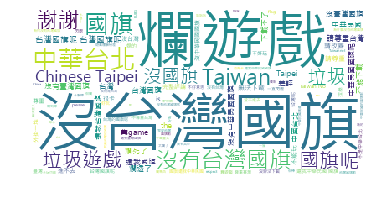

<Figure size 300000x100000 with 0 Axes>

2 星:


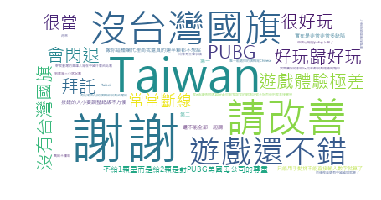

<Figure size 300000x100000 with 0 Axes>

3 星:


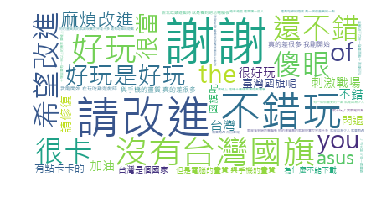

<Figure size 300000x100000 with 0 Axes>

4 星:


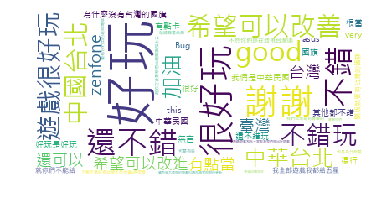

<Figure size 300000x100000 with 0 Axes>

5 星:


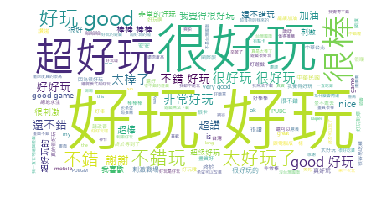

<Figure size 300000x100000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
for i in range(5):
    print(i+1,'星:')
    wc = WordCloud(font_path=r'msjh.ttc',
                    background_color="white", #背景顏色
                   max_words = 500 , #文字雲顯示最大詞數
                   stopwords=stops) #停用字詞
    wc.generate(rate[i])
    # gcf: Get Current Figure
    fig = plt.gcf()
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(30,10), dpi = 10000)
    plt.show()
    plt.savefig('PUBG'+str(i+1)+'stars.png')

In [8]:
from snownlp import SnowNLP

pubg['sentiment'] = 0
for i in range(len(pubg)):
    s = SnowNLP(pubg.loc[i,'Review Body']) 
    print(s.sentiments)
    pubg.loc[i,'sentiment'] = s.sentiments

0.00658082515177294
0.030351453967756625
5.000292727541655e-06
0.0008845826432488657
2.6112986772908187e-07
1.7173342017340332e-06
1.0967382557680594e-10
2.9978121285134662e-05
0.09744659445048742
0.0787726242891652
1.1686602342964036e-05
0.16249761723194023
0.0017248749773417504
2.174545749056289e-05
1.8971207922380273e-06
0.0006273451548698405
1.6577123755912027e-06
5.127864761700351e-07
0.057522248141418264
0.0006089739225680901
0.00047858650675025594
0.22489472489001483
1.6644439049251503e-07
0.745084909906768
0.00018413409320994223
0.003442348136109219
7.135294495252964e-07
1.8231734384421827e-06
0.000217431804819479
0.2826446891282075
0.8304969159852925
0.00038596593343087626
3.277095084186499e-08
2.2284946542883155e-05
5.743038592465055e-07
2.732014146000772e-05
0.06309525728938925
3.0617763879803306e-09
0.010801616257493096
4.22515644693533e-07
0.0002590253968945966
5.996028518284735e-05
0.8608944250158358
0.0013534258560272683
0.0007853977062848294
3.358100409012188e-05
0.9309

0.012710615737364095
0.0001633076731433203
0.007860248258850455
4.1346259749275305e-11
0.651709110532853
0.001845285098032834
0.0008356911670721612
0.7032772796235629
0.9981296982838042
0.007376060534499018
0.001523022988467737
0.00020765957846757832
0.060007570593634596
0.02613950043358637
0.0005418300623222239
0.5496667794921188
0.06710588194115141
0.09564398963881038
1.3548761346182658e-07
0.020170054701703966
5.535293868907942e-05
0.31610189403170474
5.405466669827774e-07
0.022367158406159438
2.932638198616111e-06
0.5372948774731409
0.0029270706244688416
0.9958305487376005
2.5242575281470003e-05
0.9523012110761021
0.8779864419748228
1.5073831354017742e-05
5.7014171161995364e-11
0.09580358033823466
6.628585356160954e-07
3.025908358356144e-05
0.8064961707535262
0.001254130130123543
0.9833448922330682
1.5512222717450896e-07
0.02641515800691996
0.0012540662720548212
4.617875347523448e-05
1.1501910535116622e-13
0.20126896010902862
1.6037114902722749e-06
0.1139662802024991
0.049747075786

1.961829774888013e-05
0.00019833431997096085
0.0029010997808555095
0.019343771760907624
0.9118372169882419
0.4737672181921908
0.05960591642210433
0.002925190488788143
0.02511313887576805
0.0019887158420734963
0.04164896525008022
4.188790420478483e-05
0.7889181993917245
3.729394422169463e-06
0.012413505092234267
0.22126026070559945
2.0299095737641437e-11
0.00014428170753655323
0.0014937208736720553
0.43974495643443867
0.6617806853625977
0.9983421303601631
0.358375751517071
0.036227325398269894
0.388168780936748
0.611994468050819
0.2798422678079785
0.16740626232475364
0.7304107884021918
0.9009231232008191
0.6799881415130711
0.3773187917549048
0.049613850284522365
0.005676459903336095
0.3231166404956407
0.005834141057309394
0.12993326885466794
0.1623753202470768
0.06427009592656241
0.0013655593216581607
0.014929712639472514
0.2897020473086275
0.5240734761364774
0.0013580917093583
0.9672782139387078
0.07337524019930008
0.040644262673922404
0.003008607794542373
0.34143184966580575
0.0327109

0.061855438240943306
0.42195757684506185
0.3762880755727064
0.747952710442924
0.15786901808062948
0.38555529192793514
0.5447239276798209
0.9341519030468548
0.17145391290304857
0.8797302656069026
9.148305255557432e-07
8.461703442264046e-06
0.14197660830730963
0.8468161341635587
0.3429669633366653
0.2767507697721734
6.162458556913109e-05
2.9136794695849844e-06
0.7289787787318215
0.4809442672141431
0.3394072231220904
0.767739074379197
0.24396557608109193
0.9201629039018521
0.056433751644524355
0.8690221290303785
0.7943502578600007
0.3552152736625427
0.7195148140225058
0.4568235522613361
0.32614222121502323
0.590927328511794
0.13322510280338418
0.004219273952088987
0.0003332329536671619
0.004982397315251963
0.03758078305244694
0.027482783984609238
0.747294669090688
3.5375560147876683e-08
0.011692846556618952
0.5202935118064154
0.1904686144817801
0.9957234612176805
0.00014147157457866655
0.1195969677399008
0.5249312688282727
5.2641887478999116e-05
0.0019048718602165948
0.028152200511328718


0.9530355190977395
0.8489586569317711
0.04787172545481544
0.2666421296087276
0.5864211578102462
0.4303683828344572
0.888014264660685
0.0865174362547444
0.03480243328226862
0.25588182876204746
0.450498685605465
0.6267958028101321
0.010923685088761403
0.7481846659282226
0.006159380382144253
0.732760492830885
0.1060250145040248
0.28571862043444696
0.3475536644889603
0.8326477963731512
0.5390287479190302
0.3222638792089253
0.2893755699948598
0.08428533117927173
0.10417533522137712
0.1851096995140048
0.5175154239779062
0.12952391430946553
0.01804903827857074
0.0764388745091481
0.4913467265537709
0.2564557768018333
0.43197793698078224
0.05178055128125969
0.9986206758762546
0.1910841323604705
0.06226148140869947
0.22760012586333844
0.09260882568957152
0.9495105262454671
0.0033065626392322356
1.0805774258715317e-06
0.22536670969669603
0.024790293455282497
0.05844234992671038
0.819741948125127
0.0003549026784895881
0.5320514101122349
0.42448136552337423
0.06136683971763279
0.3050828272952376
0.

0.02923218945761219
0.9781403530984681
0.8710504473973885
0.01612690570330788
0.3925672991593303
0.2802063626822445
0.5418072306204893
0.21270991843231468
0.021666345095935347
0.5455370938053219
0.5816649918945026
0.5854637901977102
0.8623213650677161
0.2829900454467973
0.0452584488100215
0.9948302976962663
0.5348199281758949
0.7495634362025416
0.5180830860799083
0.24269108773819448
0.011762521051004171
0.413030761413411
0.4827603046062473
0.8725871754844515
0.17346497942524763
0.009509385949061588
0.47217533562717995
0.360805668088205
0.07585032653075108
0.5327541275088987
0.5312848799189701
0.28592884360063353
0.18336138278556668
0.24732883986419973
0.06098078453047806
0.0452584488100215
0.2230226312575363
0.8141204920314279
0.830385332253803
0.7001404736462936
0.27390415315510597
0.9759209189602686
0.1790203740060602
0.21941138305473362
0.546884130501034
0.286119213924765
0.6786957838907133
0.7759822001398968
0.04753640459882358
0.762592235015762
0.016317568444438102
0.2634426098479

0.4602313315206078
0.3377279339029584
0.9219385403095498
0.6611961423598923
0.08462371639700428
0.3377279339029584
0.44767845850986676
0.23829051315876282
0.8268816099198371
0.8380366901931805
0.45770975952451476
0.9077687705833807
0.7085923308003611
0.24826124888180523
0.6188000081913787
0.5367272542150657
0.9249409973079813
0.5959610956512137
0.1803655605062776
0.3076259119043424
0.22659401970705062
0.3241346794236245
0.1741612874857711
0.02527076115778004
0.35543640226671647
0.8591803161912133
0.19276560144333565
0.004499082200802751
0.5662861780976932
0.5
0.12976946811839285
0.7625721645090067
0.2071314630737191
0.7504178608317603
0.007930797573582393
0.5999309764555324
0.23082833962758653
0.03862961475976223
0.04121391633556404
0.5685075092432258
0.9751349273004098
0.28565559752879754
0.9445178100579538
0.23340628208484282
0.031198648097096604
0.9005911035821151
0.8830675932127767
0.13220377408236872
0.5443456329515354
0.9504950495049506
0.09652761547904531
0.5905645702172172
0.75

0.8186448850523395
0.9971078716342
0.6558628208940429
0.4737672181921908
0.6255273679368141
0.9918032975237513
0.9749708967806673
0.012183680324058921
0.5143589764453348
0.6622542411807503
0.22280541567769618
0.0035937137490930082
0.5177112675101251
0.5405306905164671
0.14993949263245043
0.019280423907921618
0.5405306905164671
0.3377279339029584
0.4905149998103119
0.9969959729506049
0.3931623755268189
2.220446049250313e-16
0.7714872740513108
0.6991635206612437
0.39808857514062634
0.04607484816584306
0.7450666923643685
0.7714872740513108
0.38493117678047983
0.8707904206252594
0.936378400729826
0.002416059408464455
0.03589786554648955
0.5
0.012907552372954822
0.5405306905164671
0.09891390069132389
0.5405306905164671
0.5405306905164671
0.5405306905164671
0.2816821159227214
0.5405306905164671
0.15499944557743173
0.5964502622115033
0.07067382861157279
0.2700366660935013
0.8768193772573273
0.9994153139563554
0.09068164256083577
1.5126344621307908e-11
0.5218641517836946
0.36054550210328573
0.

0.0
0.44767845850986676
0.3018864446790759
0.32193684157878666
0.1802071095574439
0.44767845850986676
0.15743684775427946
0.5262327818078083
0.000889000805486595
0.5397246978689613
0.5412719600673493
0.4281248462441569
0.5
0.09857317983219549
0.8915290957829864
0.7120779284218588
0.7602616776322605
0.2797201041090849
0.27272727272727293
0.5
0.08365129686022965
5.10702591327572e-15
0.3732116277011628
0.39808857514062634
0.5848463621386173
0.2714343554959361
0.03248431031736576
0.4581875877112891
0.5
0.5
0.5617294173925113
0.39355705121875617
0.28460701258995225
1.877319888432538e-08
0.5262327818078083
0.04006088220203541
0.0
0.5
1.0
0.1213535199035709
0.4737672181921908
0.3361738824776078
0.013347835435712052
0.7428978342913631
0.4306416681780515
0.13827225598039172
0.7947225695802516
0.01820039131086515
0.1836330674965474
0.8623213650677157
0.7747823207510357
0.5
0.12179869919485709
0.4737672181921908
0.09746684403931871
0.5964502622115033
0.9408263847645466
0.9999999999512905
0.718403

0.006901653749675329
0.04080050026016491
0.11441720435480063
0.003020632554537106
0.021217252799342057
4.7068017365536896e-05
0.00048818280177476137
0.09114519159899004
0.43684827741640786
0.0033137119679095273
0.00010190269545984343
0.39773651936662624
0.6725302120786063
0.06464264035799361
0.02155675096536247
0.753171561755667
0.21580668458789098
0.7860659576639247
0.014933391514028282
0.03346361088187655
0.004328345801434597
5.8669010312151215e-06
0.482721258307096
1.8694398078444863e-06
0.14250441336759567
0.07886394810092712
0.14152828561797903
0.5480894877826167
0.30291296587155747
0.0003113204818068205
0.005100770238323116
0.002246231357474149
0.0027961954950025403
0.019816729218992135
0.6109439959257505
0.35333252970699336
0.08047805017681942
7.132171877310967e-06
0.046694439668653276
0.015052163538251229
0.017705267156052362
0.7701607258716958
0.9800310941836946
0.8381785966437539
2.7229650746085632e-05
0.05641888444260479
0.26300138242610527
0.04162996506790273
0.022460535958

0.0003112341351809711
0.07400009260514628
0.9819537874219973
2.0194074715096377e-05
0.8384763507073709
0.12793706305191155
0.6606365225052104
0.03514285962536989
0.5186588299322766
0.9881826729155881
0.8804086222862709
0.9925695791469699
0.011870860518082171
0.005506627722623669
0.15018976629861713
0.6335991304412252
0.29477059105547176
0.4835659247398353
0.23941224879338296
0.4000161352438849
0.2582921739494878
0.9108067466532027
0.984751960718607
0.0052697848256009205
0.8921303528134081
0.3452273520591257
0.5702053962183902
0.6877553546219907
0.4000161352438849
0.0980383865179354
0.05012060206601521
0.008091233207935922
0.00016599666275529668
0.6327217875852805
0.039683888365920295
0.9799707332562329
0.002426093841748189
0.07743187972170129
0.9206469409871413
0.8185795821557009
0.44287694016393275
0.271152926629158
0.41793782838453486
0.3838494557581362
0.2534194208526316
0.041327135425783035
0.8403844737243167
0.0778536639173345
0.35956016198336593
0.9600956086002759
0.7807653190444

0.047896709133238624
0.07547928072977339
4.711786516509164e-13
0.006492167344872013
0.6062919440526409
0.2555824453305169
0.07343476059937026
0.0036383023607471365
0.31113815113936216
0.3987380943098525
0.22890607179891298
0.018438989395705097
0.09150779568886691
0.04007257875917114
0.4578950302869499
0.8736978141098507
0.0573991059485186
0.23155810222285944
0.4829509574189258
0.29245489373066036
0.5718025507818278
0.42597502723623404
0.9812990701383076
0.5543276677597487
0.008852093304215436
0.09313994346553944
0.2852396273469284
0.14629679298104847
0.9467904557988027
0.31465115924357434
0.22836550666638333
0.21124192191646263
0.6731508471226533
0.6166614933002775
0.14806871175859282
0.7807458232198706
0.9111082511832405
0.9606309297563166
0.8528258865753463
0.193401389561477
0.2804930332369372
0.7409613438589855
0.49801241723105405
0.3208759221703005
0.9053685988790967
0.514358976445333
0.533500267048378
0.2734157252542263
0.7092634023668504
0.04813252674757973
0.9034813350025768
0.9

0.5
0.05999918202605348
0.9941964325409272
0.9436403112986056
0.3104020706899121
0.488108277336363
0.4737672181921908
0.2306384080725422
0.992526779027086
0.994999475860977
0.3240509962353859
0.7180154800978791
0.3795027170088171
0.041736580851012284
0.11053312581361419
0.32561300722990305
0.7894736842105263
0.3377279339029584
0.49887742870874474
0.11053312581361419
0.3377279339029584
0.7370449090688495
0.1613821725444412
0.27038035045589326
0.94159886388819
0.004331464830070297
0.5335549144165646
0.5111101067913958
0.0024759350433929406
0.18473839482402965
0.5111101067913958
1.1102230246251565e-15
0.8042787057162896
0.23183231486921863
0.743500551852729
0.3377279339029584
0.7833596258966335
0.3377279339029584
0.5964502622115041
0.05768728744518348
0.1837233963534416
0.5135835860047475
0.423746046111918
0.2058343968053915
0.17192170608583135
0.024633734828809373
0.3377279339029584
0.4737672181921908
0.3377279339029584
0.8459875258717436
0.24042513005449495
0.38785739311597855
0.4737672

0.8743228454986135
0.6770326079801579
0.8743228454986135
0.6478620470371438
0.533500267048378
0.8109136772195031
0.4862823024610907
0.4737672181921908
0.4456531855192951
0.8743228454986135
0.8109136772195031
0.5674212361406374
0.11910892828030128
0.5167644668185445
0.16849244223532023
0.6317853705682674
0.8743228454986135
0.5042906456488253
0.2500000000000001
0.3205815415310954
0.18484112635729477
0.5
0.8743228454986135
0.1460510022692061
0.7747823207510357
0.4027703152739974
0.4737672181921908
0.4666696212848531
0.5
0.8743228454986135
0.6214538539264906
0.8004161705397125
0.24574554767243673
0.8743228454986135
0.8743228454986135
0.8109136772195031
0.6214538539264906
0.6478620470371438
0.8459875258717436
0.5
0.2448360892059226
0.7923120894863632
0.8743228454986135
0.8743228454986135
0.8768193772573273
0.5555555555555558
0.8059910967056291
0.8743228454986135
0.35795118924335967
0.6559642462022871
0.9497646317362007
0.653381674802383
0.08281902915493677
0.6214538539264906
0.4303971256172

0.7894736842105263
0.19999999999999996
0.7894736842105263
0.7795229979671993
0.7894736842105263
0.12698412698412687
0.5
0.9504950495049506
0.7868518732840224
0.19999999999999996
0.19999999999999996
0.7894736842105263
0.7894736842105263
0.7868518732840224
0.19999999999999996
0.7894736842105263
0.5
0.5262327818078083
0.7894736842105263
0.864864864864865
0.5999999999999999
0.7894736842105263
0.7894736842105263
0.5
0.5
0.19999999999999996
0.5
0.7894736842105263
0.19999999999999996
0.8636363636363636
0.5
0.7894736842105263
0.9005911035821151
0.5
0.7894736842105263
0.7894736842105263
0.44444444444444464
0.44444444444444464
0.5
0.7894736842105263
0.7894736842105263
0.9504950495049506
0.7868518732840224
0.7894736842105263
0.5
0.809315692587587
0.7894736842105263
0.5262327818078083
0.7894736842105263
0.9504950495049506
0.6558628208940429
0.9504950495049506
0.5
0.23540065046524117
0.7894736842105263
0.5
0.44444444444444464
0.5
0.864864864864865
0.8999999999999999
0.8636363636363636
0.34527875471

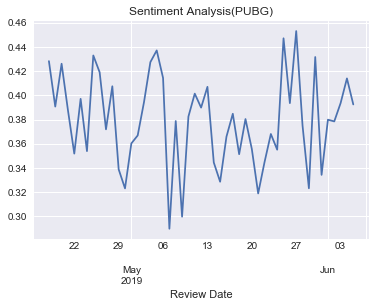

In [9]:
GroupByTime = pubg.groupby('Review Date')
GroupByTime['sentiment'].mean().plot(title = 'Sentiment Analysis(PUBG)')
plt.savefig('PUBG sentiment')

# AoV

In [10]:
AoV = pd.read_csv('AoV17200.csv')
AoV['Review Date'] = pd.to_datetime(AoV['Review Date'], format = '%Y年%m月%d日')
AoV.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
0,1,Hank Cheng,2019-05-27,1,7,檢舉系統差真的是有目共睹，一個人整場掛在溫泉沒輸出也沒承傷居然還有評分？這系統根本就是幫多...,NaN
1,2,隆挑戰無片五千訂閱,2019-05-28,1,45,嗎的一進到戰場就退一直退？？傻眼欸到底怎魔處理啦遊戲越做越爛…拜託好好改進好嗎而且網路明明...,NaN
2,3,偉民,2019-05-26,2,3,打排位遇到掛機還是連續3場!扣積分不多就算了補償還那麼少希望可以補星,NaN
3,4,申彗星,2019-06-01,5,89,可以不要這麼爛嗎 大更新之後每一場都卡 高清有的沒的都調到最低了 網路也很好卻卡到連走位都...,NaN
4,5,卓你立洋,2019-05-23,1,5,為什麼改版完遊戲變的很卡 網路明明就很好，一直跳紅色 卡到不行 有沒有人也有這樣的問題,NaN


In [11]:
GroupByRating2 = AoV.groupby('Reviewer Ratings')
GroupByRating2.size()

Reviewer Ratings
1    7563
2     939
3    1419
4    1276
5    6003
dtype: int64

In [12]:
rate2 = []
print("不同評分的關鍵字")
for i in range(5):
    review = ''
    for sentence in GroupByRating2.get_group(i+1)["Review Body"]:
        review += sentence
    rate2.append(review)
    print(i+1,jieba.analyse.extract_tags(rate2[i], 10,withWeight=False))

不同評分的關鍵字
1 ['遊戲', '檢舉', '什麼', '隊友', '你們', '網路', '問題', '爛爛', '系統', '一直']
2 ['遊戲', '什麼', '檢舉', '網路', '問題', '隊友', '閃退', '更新', '然後', '進去']
3 ['遊戲', '什麼', '網路', '隊友', '問題', '檢舉', '更新', '閃退', '傳說', '排位']
4 ['遊戲', '好玩', '不錯', '什麼', '問題', '隊友', '網路', '希望', '更新', '可以']
5 ['好玩', '遊戲', '安安', '好好', '傳說', '不錯', '什麼', '可以', '覺得', '希望']


1 星:


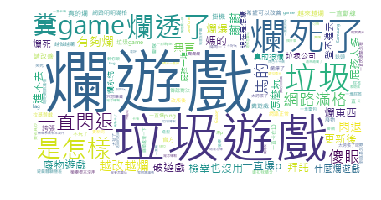

<Figure size 300000x100000 with 0 Axes>

2 星:


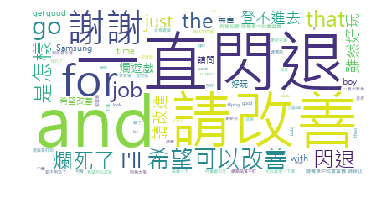

<Figure size 300000x100000 with 0 Axes>

3 星:


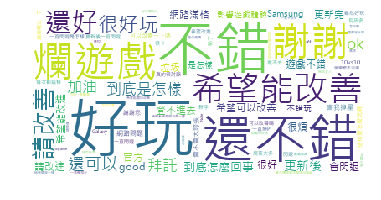

<Figure size 300000x100000 with 0 Axes>

4 星:


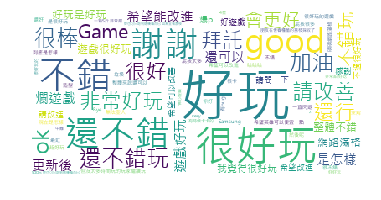

<Figure size 300000x100000 with 0 Axes>

5 星:


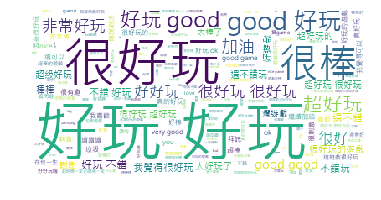

<Figure size 300000x100000 with 0 Axes>

In [13]:
for i in range(5):
    print(i+1,'星:')
    wc = WordCloud(font_path=r'msjh.ttc',
                    background_color="white", #背景顏色
                   max_words = 200 , #文字雲顯示最大詞數
                   stopwords=stops) #停用字詞
    wc.generate(rate2[i])
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(30,10), dpi = 10000)
    plt.show()

In [ ]:
AoV['sentiment'] = 0
for i in range(len(AoV)):
    s = SnowNLP(AoV.loc[i,'Review Body']) 
    print(s.sentiments)
    AoV.loc[i,'sentiment'] = s.sentiments

0.010950942600101543
1.002923555759594e-06
0.008082217528863178
0.01564559168024149
4.126199284359977e-06
0.0004552723212960519
4.5372043566693776e-08
0.6316609002398303
0.0012020477888725623
3.0059635278800734e-05
0.0017501894263998174
0.0012040077327599708
3.049800458843066e-07
5.80082530885484e-05
5.106289430956146e-06
0.008670783914233371
0.012248033531010338
8.58952269822133e-06
0.000680632424743921
3.7511728160355418e-06
1.0053118337793876e-09
0.008852961606540366
0.0011180348568173848
0.0002077993531428568
0.00018912114644276112
0.3226253859693845
0.9722120195305953
5.999240348941726e-08
0.2022986394285483
2.0266891248565955e-06
0.00016792043830793357
0.009023672383299042
0.3524196720802114
3.6417908921837494e-07
0.7861359485074366
3.7864278834232046e-05
1.7228583559791844e-08
0.3889919254679558
0.9992371509785379
5.669412651010397e-06
0.015025081324531286
0.0012152211242589805
0.0008777161392963251
6.134433783167026e-08
0.00011986693140630944
2.9385562871908633e-09
0.0003227576

8.838254406795532e-05
0.003157886421645828
0.5373262861909575
0.22299154002401944
0.004127791185156049
0.995915130379234
1.5641215276307463e-06
0.01309611984720127
0.0029375096215463747
0.002018677061427554
0.02933172744974688
0.06033493785616517
0.1065482496289214
0.011092930875516549
0.02088833074218266
0.029849148040506757
0.008913680386697376
0.09405287048968514
0.020539333225046308
3.225878553170247e-08
4.920875406377867e-06
0.0029514788667863723
6.294892776481653e-06
0.0017631457582218957
0.09010299690478552
0.6167081531323346
0.0058976726825425985
0.1772926487493296
0.0016740250704561088
0.0003926716363927829
0.0033682497210809625
0.12844450078146652
0.15208600667092909
0.0011270096167327326
0.008516690921398062
0.00014840756730816196
0.002484322971905484
2.0192736371882347e-12
1.2828763717998015e-08
0.0002670441819790925
0.0001722291825073663
0.9932334778787675
2.42207263341232e-05
0.14736483436219505
1.1177487767577432e-06
0.2619939710353618
0.37167083183460814
0.0374295826078

0.0017038512175616694
0.0343801389377868
0.18234542511868435
0.03578380391619951
0.0038687746867788197
0.03208951255727688
0.35367408074281914
1.5149041214912451e-05
0.021416635000815365
0.0017164741108076642
0.113795023391567
0.21177180404555151
8.158931401602842e-07
0.00046518162874020774
0.001358455282967741
0.014374380497877981
0.030833517127969667
0.5167644668185445
0.06317541654173398
0.1511685250235697
0.6690458272206069
0.14961221087908105
0.0015165187717985917
0.005217435144655114
0.0007603115165808472
0.0008748177574238181
0.057477401691797714
0.022597585608189474
0.1165632803433968
0.00115268623566267
4.98813295113365e-08
0.0014828635177880356
0.09269110139867953
0.145895663093343
0.12404131276352859
9.710804780760363e-05
0.18440035753341244
0.0016452654018123125
0.6136649263679842
0.6184048252782297
0.01104097298210982
0.24776995068562613
0.0005533691641197436
0.047156901945664575
0.12336458615984314
0.7548228612903104
0.46971649730128007
0.22452074864088056
0.1619625837137

0.8683382830316736
0.8953244065219781
0.7477419738803165
0.30728991775283365
0.00044160391862468895
0.04514478163870317
0.11626421572619317
0.014562138386588375
0.039441399224559026
0.22262590747958355
0.31864244773821804
0.2927326714941827
0.8501598100548067
0.6795159978569604
0.42807472570681493
0.008143577941287616
0.7303102176679165
4.377506357400307e-09
0.6593210516265493
0.7507431595882452
0.8244503678656402
0.9735813379693528
0.986470222760046
0.42697919182046506
0.09214363494587718
0.8493712553908984
0.2783222182012185
0.2219665678785141
0.1679397796848876
0.5278295976225033
0.03944491034098929
0.49209420700091366
0.9419224632676213
0.05884287016917289
0.420121222412726
0.5841276052340301
0.4308058359652446
0.044809075599956616
0.3034564509959089
0.48043588264130566
0.08776156489455444
0.06973638928454395
0.02088835734133332
0.26886235615524623
0.214910004268141
0.4313086024983904
0.564167113040344
0.22965089460307853
0.27669974755339954
3.348762378507786e-09
0.533500267048378


0.8707904206252594
0.8109136772195031
0.5555555555555558
0.2500000000000001
0.22443468052158877
0.421874597530976
0.7916666666666667
0.8042139962839138
0.864864864864865
0.7894736842105263
0.6070326781070209
0.19999999999999996
0.8109136772195031
0.8743228454986135
0.8109136772195031
0.9005911035821151
0.864864864864865
0.22336781321317445
0.459647671662585
0.4737672181921908
0.8743228454986135
0.09379796335294632
0.7894736842105263
0.8654879391484723
0.21692402210608674
0.7666873339790404
0.6558628208940429
0.18498179172786067
0.669724770642202
0.47810505531729497
0.6250780319212258
0.9557662906845337
0.16849244223532023
0.8157633410463242
0.8743228454986135
0.864864864864865
0.421874597530976
0.6558628208940429
0.6933566964021276
0.8142934963007282
0.8743228454986135
0.5
0.16849244223532023
0.6299996153468053
0.875
0.7374952463385367
0.8743228454986135
0.5167644668185445
0.8059910967056291
0.9117356759690655
0.4737672181921908
0.8743228454986135
0.4862823024610907
0.5
0.1810682742705

2.1994722798623911e-07
8.41073018187366e-06
0.998002956657999
0.002231251057115524
0.02080526093435131
0.0900683340670747
0.00013678910644288056
0.004241433205634748
0.0015728686793294866
0.00011381046541913964
0.8899800761550122
0.005738271095884873
0.06335664852522838
0.00995069309103791
0.0001227255241664782
0.22390470285163422
0.0018516709487023109
0.00393113872426476
1.0266260247360215e-05
4.772139826747512e-06
8.019865275521454e-05
0.00017787470913033232
0.5086732351357367
0.22140392797216646
0.002446485676039223
0.07944747700349508
0.0013913088349618574
0.1787078938680564
0.05847259002509919
0.00018789568655674938
0.0018323218356138815
0.08967041362437012
9.162250686345352e-05
0.014131241397002614
0.0011600645779690222
0.00016800646189019108
8.225936260319866e-05
0.03634823855196767
0.16662043613517308
0.0005823273094264225
0.00045704433428916946
0.10161724483233403
0.03967573765459376
0.0028460619775899643
0.34342099542376603
0.21833213166366994
0.0001788751816833578
0.85263004

0.32463268048079497
0.00011558431623015508
0.0009866017700957963
0.0038114065243246564
0.00028764779285439523
0.00017415386115382514
0.0001808203457890345
0.5612734125627077
0.9329219642311527
0.0012735839385664693
0.00040818509675999426
0.012485441893460347
0.035694148669579095
2.083910265460176e-07
0.017642880188070253
0.4646339121157945
0.7444840689841765
0.00039158576632292164
0.14484418589234382
0.06303729069676411
0.29108156372662153
0.010536526978013994
0.006563710294469782
0.07712476780042077
0.0014580578007267198
0.24215095992421087
1.9885936453079012e-07
6.762231617052361e-05
5.5628473801694334e-05
0.1048774236001957
0.0024144467552247306
4.2214071357293825e-05
0.0014637400318088245
2.1956017448143683e-05
0.32952565422988644
4.318224056110154e-08
0.14529368460068492
0.9511101710996213
0.003024830755592456
0.07402872601584254
0.0003330412731638033
0.00973965506090746
5.353290144627376e-05
0.00589096133840783
6.0850798623057756e-05
0.5848655782331713
0.00397443091451144
3.95361

0.01374340749577907
0.6385287041965748
0.14422450653126861
0.8537452035549138
0.1959155336491758
0.0027700423239592764
0.911418180842375
0.061511890352833
0.9859626476258836
0.3472779138189551
0.3291838695178205
0.11546284555294972
0.2923509241279475
0.006364245185197848
0.02189848146339335
0.013147713038182629
0.5076435157523679
0.20826895286731129
0.18686613522067086
0.10375125863661461
0.04367748718322906
0.004186946595656438
0.862014798543605
0.998473272865289
0.547360983265141
0.28546552171119344
0.0015621629696506156
0.0017831530120361316
0.8426018513276882
0.008763171209682397
0.04555374138816359
0.06530941520181022
0.02515327666388245
0.0735726360188993
0.09733606103073034
0.10596417114832657
0.26133489516094677
0.05922757625450248
0.999257779913831
0.0004603421993358836
0.13473929347134006
0.3195847056498836
0.47553200203596957
0.38951053979845973
0.29886224545726103
0.8304263056739424
0.635238612317968
0.9582615757203451
0.00016396274178742676
0.003314249851026685
0.245781462

0.3802940335978141
0.7768516051760223
0.9582274272926024
0.9637860574538305
0.10427515407434285
0.5577429367129235
0.07917691067355892
0.28619306403401445
0.7885591343859168
0.27701103124314175
0.15883896244472318
0.020192661189600836
0.07549096627096341
0.08304821310079902
0.24232175697470193
0.5060996152774874
0.9042501271837468
0.02543277617759032
0.9552468937862564
1.353206394216766e-05
0.7842912018028751
0.45341336732097626
0.7752260540666044
0.0014774353664640527
3.861138915906004e-05
0.0008950074391441687
0.17712998385099876
0.08555640800239506
0.6123761692920874
0.00032921965921861585
0.3420393131811593
0.21818886561702122
0.9779770822587719
0.9843441386301668
0.7872881341917993
0.12579033436440712
0.03404516737964769
0.6951076566172224
0.7198875167800596
0.8885905756785577
0.3104035374540155
0.00483363386794422
0.09067703133260008
0.1791311252713802
0.552127066132847
0.192181718928497
0.003948897631821602
3.959721439628083e-11
0.08201912343973272
0.1349837734688536
0.360392959

0.01583676124754052
0.9967456065859323
0.27420489480979116
0.8109136772195031
0.4290059162080211
0.6931978425614437
0.730070374279199
0.8743228454986135
0.9933273272648818
0.10843916103606455
0.12020500720068761
0.24656474312857712
0.008158719658971525
0.4704075971908869
0.22602677427741136
0.6242414203094124
0.11693925556437224
0.2151841323138186
0.002852185342001934
0.8743228454986135
0.8743228454986135
0.03492334995118496
0.8853478217433287
0.8109136772195031
0.8444280953467111
6.260356979570503e-05
0.9101395937607051
0.8437938897592069
0.21834786975523257
0.5358720990873801
0.8743228454986135
0.031261678418885386
0.05515006728702876
0.06563530031411346
0.9918032975237513
0.017707902858712377
0.7370816058159477
0.8074053981936492
0.16403428733931802
0.6250780319212258
0.06520045310627709
0.12666574951628662
0.10230483938448187
0.0014850924838596402
0.03809862696498223
0.10164806759099576
0.02846223971718298
0.07943036544473536
0.46750498136323726
0.16849244223532023
0.01214850862929

0.8853478217433287
0.9970879406640859
0.4279311989545127
0.6317853705682674
0.421874597530976
0.6070326781070209
0.8743228454986135
0.5555555555555558
0.4737672181921908
0.4737672181921908
0.8743228454986135
0.41868568501062997
0.8743228454986135
0.8743228454986135
0.8684210526315791
0.8109136772195031
0.24509033778476041
0.8109136772195031
0.6317853705682674
0.864864864864865
0.8707904206252594
0.7156267195512651
0.8743228454986135
0.875704310244493
0.8743228454986135
0.8743228454986135
0.8743228454986135
0.9453126197756838
0.3693910911319984
0.8743228454986135
0.15258541937922643
0.6824711549540775
0.7795229979671993
0.7923120894863632
0.8109136772195031
0.5
0.8109136772195031
0.8743228454986135
0.8743228454986135
0.5555555555555558
0.8743228454986135
0.864864864864865
0.41868568501062997
0.9101395937607051
0.6820106287554023
0.8743228454986135
0.7923120894863632
0.8743228454986135
0.8743228454986135
0.8654879391484723
0.21377556010192
0.5
0.8743228454986135
0.7923120894863632
0.7894

0.5
0.19999999999999996
0.7894736842105263
0.7499999999999999
0.7894736842105263
0.7894736842105263
0.8999999999999999
0.864864864864865
0.7894736842105263
0.26779983460187595
0.5
0.7894736842105263
0.7894736842105263
0.7868518732840224
0.7894736842105263
0.5
0.7894736842105263
0.5
0.7894736842105263
0.19999999999999996
0.44444444444444464
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.44444444444444464
0.7894736842105263
0.12698412698412687
0.9504950495049506
0.5
0.7868518732840224
0.44444444444444464
0.5
0.5262327818078083
0.5
0.19999999999999996
0.8636363636363636
0.44444444444444464
0.5
0.5
0.5
0.7894736842105263
0.7894736842105263
0.5262327818078083
0.5262327818078083
0.864864864864865
0.5
0.7868518732840224
0.19999999999999996
0.7894736842105263
0.875
0.44444444444444464
0.7894736842105263
0.44444444444444464
0.864864864864865
0.5
0.5
0.19999999999999996
0.5
0.7894736842105263
0.5
0.8636363636363636
0.6558628208940429
0.7894736842105263
0.7894736842105263
0.5
0.789473

0.01726510059995434
0.9889500682577461
0.0010874835376198932
1.0829031338310813e-08
0.0075050753778933554
0.9970863608665509
0.08332569874779927
4.171807868269539e-06
0.0006266308423076294
3.943006598028376e-05
0.0029238193053957584
2.4782735197348416e-08
0.5093445151991931
0.5713782074438889
0.07400597555751864
0.0010576095660222995
0.001996277712254524
9.297616873626957e-06
6.73894841263234e-07
0.04498780031717631
0.009075353427199007
5.156719495857942e-11
0.000539121518243646
3.433520301410198e-08
0.9489936346819952
1.2095980690851604e-05
0.0020134150774598902
0.0009311921014095725
0.440670958169455
0.31163684332761554
4.260172742243107e-06
0.00392934076838114
3.393202462942391e-05
0.0001107660992938353
0.891609068846611
0.006636631676817051
0.2647087066413195
4.397766828478922e-08
0.011003717579118
3.321866142225183e-05
1.6137363367807467e-07
4.8594820326708366e-05
0.006429678785490167
6.515592059219699e-07
0.004443743113992316
0.0675392608939882
0.048113775691897565
8.064089804959

0.20806675454953016
0.2681401190561543
0.2152940918826064
1.8123205741349402e-05
0.8704846744910206
0.1370366421842718
0.03095756616429668
0.03100679642578341
0.02702246946282838
0.3040245392026476
0.22039258686918684
0.9441548070453405
0.11206780128394733
0.053876456256167105
1.1010594856752931e-05
0.0007755309335067961
0.7119054017999298
0.054354017529944954
0.031535700686152635
0.21720494783368272
0.0062168266987475684
0.0015118827416674696
0.004374535998524665
0.8738990389963412
0.1326471183032143
0.006100375686590831
9.547232182605114e-08
0.019868777709664776
0.2494552061389732
0.9121311677367383
0.00885635252252781
0.0009504302480781712
0.08657706578468016
6.691031066985431e-06
0.3388048863811224
0.00016499765339517136
0.1078160384102318
0.9522287622500084
0.025699141394004976
0.2034797257109131
0.5226099861273722
0.0006456687001344941
0.010495930704714551
0.003458244669471866
0.00043845521138752286
0.786808379464966
0.009838925792793773
0.026196747737307402
0.14343282790592016
0

0.5875211305051228
0.4477437968239115
0.9858259047213181
0.1443751523966561
0.2892067861749522
0.21270991843231468
0.49532846720056156
0.39301105610056897
0.04539553906358795
0.8473883725101216
0.27140429477109784
0.44767845850986676
0.135434019788799
0.5560800153575242
0.226455037788433
0.06704860737881713
0.421874597530976
0.787676959061553
0.45490274651125906
0.4429151707949982
0.26101812024302484
0.7053741928599279
0.1369811128132239
0.0744252206530791
0.045483275738013695
0.5307412823806509
0.025717446673388378
0.12033537139646533
0.8272539223395493
0.2120035965435817
0.21912151049980477
0.14227677691770668
0.47768168249316756
0.5819510318820728
0.12882003863582436
0.2784731954024985
0.30280878991124405
0.16932555155984408
0.35528008566385405
0.8369587512895927
0.017924927059160378
0.034821978776804596
0.8999999999999999
0.31175758831117595
0.15344738182255624
0.40182631993198414
0.21758298612324412
0.5419077960425621
0.6907058342569604
0.6004459079630597
0.21377955174003682
0.129

0.5
0.7795229979671993
0.6558628208940429
0.7894736842105263
0.7795229979671993
0.7894736842105263
0.5
0.2500000000000001
0.5
0.7894736842105263
0.27500000000000024
0.6558628208940429
0.8636363636363636
0.5
0.7894736842105263
0.6558628208940429
0.5
0.5
0.6558628208940429
0.7894736842105263
0.7894736842105263
0.9504950495049506
0.9504950495049506
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.5
0.9998425629810176
0.30610818998901557
0.9969959729506049
0.5
0.5
0.9969959729506049
0.9969959729506049
0.5262327818078083
0.9998257204607802
0.7068086893529308
0.05870054986620166
0.4843517138599106
0.7121184143503381
4.2772668160218075e-05
0.47680412371133973
0.47680412371133973
0.30341342927731996
0.7714872740513108
0.6382252559726964
0.5
0.5
0.5
0.5
0.5
0.39649036561138595
0.5556792371668366
0.0
2.174327384807384e-10
0.0
0.0
0.0
0.708052116518776
0.5964502622115033
0.9999972455185736
0.8250264673434548
0.00025363262445099455
0.6065479232476357
0.8521129680229954
0.4179954443200885

0.026147584842105887
0.04908638497495432
0.003243615013580059
1.890992247566281e-05
0.0002930259280244929
0.13555642786140054
1.8347692309905739e-06
0.000749881086063886
0.870140975324866
0.09768974538255959
0.0002521078703058288
0.011417598872525248
0.006338287781899599
1.567725936846287e-07
0.004730671211747861
0.06628409164591886
0.03523922102510524
0.0005771657472773972
0.0014349351005202848
0.6078073250038619
0.05264543059761417
5.229479287238714e-05
0.647284415062822
0.07431956943897111
0.047453027697381245
0.0003102745884305813
0.0010669081642286082
0.00038543536561885805
0.035747548092876835
0.017721754183432914
0.0024327165059045974
9.674804352099997e-07
0.019334355869408015
0.0013096102106234797
1.0496032054607696e-07
9.138702759314832e-06
0.9640866776499099
0.3390108768234562
5.5177209495660406e-05
0.0035884609338924234
0.14128530046121313
8.59621263060717e-11
0.0003324832950905021
0.3995840605885713
0.021122507741069274
0.019730218329089166
3.4960513894954914e-07
5.92249772

0.9716429481111388
5.529613284704915e-06
0.0268481520489402
0.036545055818168026
0.1758109898907203
0.7262168002477702
0.016490520322461566
0.010729953762039113
0.0024530657417347612
0.018407841472658726
0.16321167332641595
0.00126755145487778
0.0007954321635630368
7.720192747817656e-05
5.256204201664616e-05
0.1656998911219364
6.370020066981397e-10
0.004161209705333957
5.235291376737283e-05
0.06504545441541254
0.0024056143401656183
2.353253704123759e-06
0.06059544765661751
0.0006493082050534893
0.2956889353551163
0.003257681595306705
0.9816938463743633
0.2489814549739393
0.02438909719046123
1.6423192572556644e-07
0.9440220326679857
0.9567566497922455
5.101562836618001e-06
0.04529984302017798
0.9951806634671561
0.01789422396081697
0.04109655464379258
0.013219220142026145
1.7855972581415358e-05
0.01821370778670328
0.0002774958474488498
0.0017078782865893594
0.490565595172057
0.19784891285483608
0.11413827172716917
0.0029599953109937793
6.661338147750939e-16
0.015585270322678313
6.0312030

0.07552182320262224
0.05199995183349326
0.00040570135904982596
0.016353859300211937
0.9462281729834228
5.052550653372734e-05
0.006236698601005397
0.0013057866958626763
0.1901145640477987
0.1448847448551016
0.7561214908201208
0.2640524248430589
0.9131773279441214
0.0011927529975086504
0.02249902804413917
2.3500777649454463e-05
0.09777289069671158
0.012834318474220896
0.162603045711457
0.012580293721332958
0.016615387534896553
0.12845683066380587
0.49371918493513656
0.11522659950330616
0.8358360911221515
1.7616480501136955e-05
0.0013585025290688835
0.0002386063536981009
0.0008190052851901886
8.181899269210646e-09
0.051938281859767677
0.06820302668224842
0.2749673077849063
8.261301309708813e-09
0.0
0.060553001310512555
1.1837841995099296e-05
0.20583003404986977
0.33124102935083455
0.36777813416086325
0.2690395876073841
1.5910383479700307e-05
0.042666150515998646
0.5684418957899362
0.04465869216663254
0.05276293407700916
0.8723363755864872
0.23084856844663215
0.020793421073562746
0.2900630

0.6612255144092378
0.23074831957104358
0.029236893732372482
0.015055690364406904
0.029793034638862403
0.4913551446749108
0.4220533025162657
0.6538889826340162
0.172271582277865
0.03507632657639492
0.11733130009614645
0.11362867375074537
0.0008123883434790757
0.026015318992100855
0.7358286646524577
0.02652835890245475
0.3120578676088781
0.401883465344686
0.7206753052976457
0.0021837478801194354
0.001130500182772498
0.4437457131562472
0.43363050713876583
0.9738198224901752
0.014863956695198799
0.2201900865592028
0.7845642135771466
0.0002773697281930332
7.049916206369744e-13
0.11856892860958479
0.9847320098715502
0.11567516774120967
0.11927166830641422
0.8174207756088399
0.040839217641953085
0.9923240290175471
0.006565067279997505
0.02811277475930274
0.007503698283633398
0.9570735536423927
0.3267256906611542
0.03137658476490668
0.29660344363606383
0.7582147441235073
0.05744752318194135
0.006874406969573421
0.013985447875260015
0.4733930873992429
0.18325681968260332
0.08186558433948465
0.6

0.08971946116341334
0.595362672271142
0.3522776664968049
0.03762186315165972
0.19214113622210682
0.01735994929232354
0.16849244223531923
0.25182110699291826
0.7284833067109973
0.46073148841656275
0.06158372362785014
0.021752180136790922
0.538075893802909
0.6934090768334017
0.8473883725101216
0.012016001771690266
0.06327130524072389
0.9172998301145509
0.0744252206530791
0.44767845850986676
0.0530206661502175
0.010994928193850728
0.11024261245469258
0.9936302630884688
0.019601868909741027
0.33725020697534724
0.859596497500022
0.033884283730772125
0.5891093308114743
0.8233033863614557
0.29143004792816063
0.544568770239014
0.018719038770393492
0.20246412093154276
0.5104768081022298
0.00280037321424087
0.599059211145957
0.7952295023311066
0.12315053257690667
0.6312852235961545
0.5560800153575242
0.274024767318252
0.0919839931540608
0.3893491391333802
0.9163230158178208
0.716981648500036
0.11351302767416283
0.4158319890284651
0.35290583990458957
0.2314598346583252
0.8165015521624781
0.454736

0.2520707533540666
0.914686034383449
0.05307538601986517
0.026377866184996712
0.06880957338933824
0.19114638624554492
0.12588964453271656
0.8115804973258062
0.9918408900393787
0.9578554039427292
0.0019407850611388167
0.2861269310544937
0.056641229505492
0.05790224426918811
0.421874597530976
0.9593473686498762
0.0030123075005740185
0.7494973322988572
6.482150372022488e-10
0.999315558514144
0.4737672181921908
0.3104160936911723
0.5294947133879224
0.9913946683714691
0.7659549408328674
0.9520071646663627
0.1810682742705132
0.8743228454986135
0.421874597530976
0.2554878760912733
0.8987301826169566
0.022185036462731178
0.1905779822723156
0.012543094735644189
7.438101023993227e-08
0.8623213650677157
0.10563626122180847
0.8109136772195031
0.09412320867979351
0.1837233963534416
0.4010016307276185
0.8743228454986135
0.7556794299033308
0.6013058585954414
0.8743228454986135
0.2986486486486488
0.8743228454986135
0.7767496370202684
0.421874597530976
0.11819048949597943
0.41128782603965697
0.81091367

0.7894736842105263
0.7868518732840224
0.5
0.7868518732840224
0.7894736842105263
0.8999999999999999
0.6558628208940429
0.44444444444444464
0.7868518732840224
0.5
0.7894736842105263
0.44444444444444464
0.7868518732840224
0.7894736842105263
0.37244510202187986
0.7894736842105263
0.7868518732840224
0.5
0.5
0.7894736842105263
0.5262327818078083
0.44444444444444464
0.7894736842105263
0.8636363636363636
0.5
0.7795229979671993
0.7894736842105263
0.19999999999999996
0.7894736842105263
0.5
0.44444444444444464
0.5
0.5
0.5
0.7795229979671993
0.7894736842105263
0.5
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7868518732840224
0.7894736842105263
0.7894736842105263
0.5
0.5262327818078083
0.5
0.19999999999999996
0.6558628208940429
0.7894736842105263
0.5
0.7868518732840224
0.7894736842105263
0.7894736842105263
0.5
0.7894736842105263
0.5
0.8636363636363636
0.7894736842105263
0.5
0.19999999999999996
0.7894736842105263
0.5
0.7894736842105263
0.44444444444444464
0.5
0.7894736842105263
0.78947

1.3191962643377408e-06
0.01314037216239361
0.011393497359337035
6.0090062272477596e-05
0.015043899407713113
0.10034053358008332
0.00682862253673755
0.0004413902038120643
0.9988901214826078
0.00013618640197299303
8.41141294039005e-06
0.9951964076473738
1.6240576522497108e-06
0.5404679607932379
0.0010419701478462384
0.09561320434661891
1.4200344248260777e-05
0.00035488956982487885
0.007441810216151978
4.8995097756687755e-08
0.03703636195011317
3.646810358137742e-07
5.609130653283501e-07
0.029505060059950905
0.17639105648173614
0.00019778906903067384
0.003109815030574614
0.0008431480421485782
0.6399369834388161
0.003930054674759043
1.7497675064426232e-07
1.3926593211976979e-10
1.4886597510255228e-08
0.7495581518653336
7.942917545911143e-09
0.002819479204692721
9.083233265716473e-05
0.013220844560296707
0.021970742583922398
3.4958806638396567e-07
0.001256756380232038
4.264094389805351e-06
0.010456546509085674
0.6309251462607006
0.0003818488386676533
1.4158663959817908e-05
0.006546361398873

0.03784364972546583
0.00013570518361794015
0.0001558450587272331
0.0080352865941824
0.0044210406852568385
0.9384410645073281
0.015453978827325576
0.015075513338921542
0.0
0.002900576236861574
0.0008835074473363402
1.28387908748806e-07
0.01774040678280997
0.6385479764060509
0.01849339754441459
0.24284395224830158
0.007905609899076516
0.5714637826230553
0.4278833490394305
0.09788503891755052
0.0005127077991440299
0.4019575134919686
0.02967313315310316
0.45165655550710593
0.041042812369287196
0.9050284508715308
0.00025285187274193266
0.0026337026865695945
0.05644374441513378
1.6535259635963584e-05
0.043386881427975754
0.008686004310315854
0.09376035966395979
0.0003217651111256936
0.11311897302524698
0.3537795048056711
4.173390904615992e-05
0.07978386591785236
0.0020387819740501634
0.011326991857508406
0.768317679258658
0.031066295923965703
0.1703680702287621
0.3500002717883193
0.2868972679448901
0.21806437066875206
0.0001573307036669691
0.9688729807524017
0.9994722074346533
0.057999764140

0.06300329739644639
0.9741420891814311
0.3173359869526515
0.05644328424175549
0.48943571829552923
0.043167106952745615
0.10577060202017641
0.7364871971758358
0.8054428311194411
0.1833809398597238
0.532431268230751
0.917937302247954
0.4011384717725982
0.003087828081499211
0.005305836766556271
0.17813442114013067
0.3132629246083223
0.8718985221993996
0.9439143472633552
0.0106898858703951
0.3706942778974215
0.1569282256629545
0.11023698690565842
0.44694368296201614
0.08278624044630045
0.45091690489381053
0.01635737942641502
0.9856566682713973
0.4810358508978053
0.4376767933224388
0.15291337185798914
0.5877541951122279
0.007830867324118418
0.287463251398128
0.23554849139126488
0.07786058429699305
0.8884221032344255
0.013066287710084112
0.010495888505972384
0.26141582258988305
0.00016679750000492266
0.4777414177873187
0.14724099588280115
0.010774665334917777
0.9482554597647866
0.04683682984430182
0.045361990768159166
0.8192452464880243
0.4643177315566783
0.5667817186812801
0.260479043473301

0.0012825386285613138
0.09818395449555906
0.2898526719538357
0.13818956589135545
0.748182124151622
0.5251613392981682
0.5288928307563808
0.8881357499916488
0.16177951390481715
0.03417955433410447
0.2857398972508314
0.13445694803339292
0.7058867626171423
0.07303336809601768
0.4553544710556786
0.7861466002060018
0.8562634934928689
0.7682931029723921
0.9640271038454421
0.3076259119043424
0.9001128000282635
0.5123235733367495
0.3919803680681576
0.0010250640067530625
0.31070640511459413
0.8382458283560769
0.09308227395523838
0.6914580787845723
0.8301004199077078
0.021343266033249875
0.5688538068504432
0.27658024303750306
0.05959549912988593
0.5627469840816565
0.9476040540773125
0.14150973340749062
0.8841188639748583
0.692882679108809
0.02214113985065891
0.1895020992692762
0.4521576680953038
0.35023547352783413
0.5831839978063442
0.943971116882268
0.2999757537135844
0.12201333938817527
0.14361845984672472
0.13377153106370454
0.4844622983627105
0.02334853993252317
0.03683553658162908
0.503272

0.7409750003945876
0.08341025693101867
0.032139737585931694
0.24193831549861822
0.15109762137697214
0.27658024303750306
0.16849244223532023
0.10767567274989343
0.27949292026073624
0.27597342183918117
0.9599449123712389
0.4737672181921908
0.6093946939548435
0.16849244223532023
0.6430100135392368
0.3076259119043424
0.4528507084143566
0.839531536459978
0.8027933085018634
0.2394945915253529
0.4528507084143566
0.6585128654612493
0.4905149998103119
0.385174681551793
0.2548769679185693
0.012565732088567483
0.23183231486921863
0.24336030146989118
0.46143416374295765
0.27658024303750306
0.3223229406894592
0.0879745933408419
0.23183231486921863
0.5
0.15428549896981014
0.09936153373733736
0.05456998161171822
0.8935920672703626
0.5799562736196155
0.6810376964239249
0.2795354781893451
0.8835083948573225
0.4737672181921908
0.5817176723447774
0.4475961338959168
0.8869533402416361
0.42869199648363276
0.8674735273759411
0.9603785248876837
0.8428875502549201
0.44386995433021026
0.8835083948573225
0.7106

0.8654879391484723
0.8743228454986135
0.8743228454986135
0.8743228454986135
0.5294947133879224
0.421874597530976
0.8743228454986135
0.8654879391484723
0.8743228454986135
0.8059910967056291
0.8109136772195031
0.9257234969733869
0.385174681551793
0.2980829033187098
0.8743228454986135
0.05327122717701849
0.8743228454986135
0.6070326781070209
0.8743228454986135
0.8743228454986135
0.8059910967056291
0.8961348902334728
0.9504950495049506
0.7894736842105263
0.8743228454986135
0.8743228454986135
0.7894736842105263
0.4737672181921908
0.792610463856879
0.6214538539264906
0.3256085840430438
0.8383826153364834
0.09379796335294632
0.3565831365507899
0.5
0.421874597530976
0.8743228454986135
0.2658118281445061
0.8109136772195031
0.8713226987197761
0.5587027814216756
0.41868568501062997
0.8743228454986135
0.7714872740513108
0.6000799053524202
0.5030325164171094
0.01635559589549096
0.22331512353947947
0.3320699871051077
0.009660779343616976
0.8070785901126465
0.37768537017156567
0.5
0.7942816952352106


0.5262327818078083
0.5262327818078083
0.9989164670864218
1.5621805560250834e-07
0.16666666666666674
0.38028169014084545
0.5
0.6497584235794808
0.5
0.566066615109746
0.9068477015861168
0.8999999999999999
1.586835016165189e-05
0.11330869059430448
0.44767845850986676
0.44767845850986676
0.44767845850986676
0.9998257204607802
0.07585387282167888
0.0
0.27583251816996457
0.4843517138599106
0.5
0.00030383457259586244
0.9999899160802146
0.8565793025077467
0.7899931017630842
0.5817176723447774
0.8623213650677157
0.5
0.13953085727796322
0.1343563011685318
0.7714872740513108
0.5
0.5
0.004737256301900916
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.3269870571418645
0.5
0.5
0.0
0.5
0.0
0.2771247798995966
6.217248937900877e-15
0.9699953002177292
0.002032150699685986
0.5
0.8897661158350774
0.034817869947422864
0.9297694256831476
0.11416254502604573
0.37912804597534866
0.5
0.018907284706603522
0.7051525700349285
9.628364772140685e-11
0.014953693710222704
0.941373715405734
0.0
0.054852655893718794
0.0
3.82060

0.00022387845684390673
5.265302580270692e-05
0.9978425610225526
0.006450198647257932
0.11379731475445365
1.5568379918562414e-09
0.0002052574082912484
2.1189182934588935e-05
0.03334056897087034
0.13275852325858062
0.05418407140271386
1.0673542065298136e-05
1.2437161189815527e-08
0.00023207389000490242
0.004919460069727544
0.027084943772881176
0.00048110289735803224
0.002640008535973015
6.184605983405866e-05
0.36638732581406785
0.006810235858000779
7.964083386613474e-05
0.011322895363669039
0.005157184504758439
1.130244119851298e-06
0.06297532756127489
0.01817367774025702
0.00042714042774627536
3.8347602759891686e-08
0.004131791387287143
0.000497896546860499
2.832393430907132e-09
0.0013174410339187315
1.9564062546661987e-06
0.00016650211423019368
0.34046729820956667
0.54584331298527
0.08988886723234879
5.9705854090763566e-05
0.00778550045255344
3.9201710251624e-05
8.291003352034476e-05
0.000260943317396678
0.03449880436232866
0.18858528571801036
8.619604805470971e-07
0.03564901579322699


4.0021080955798816e-05
1.0514211771228688e-06
7.783781120762612e-07
0.011649544520767385
6.763681621202444e-05
3.733359025237526e-05
2.088938355626624e-09
3.88904679803348e-05
2.2299216384524811e-07
0.00025741852049521174
0.003951736662326177
2.2798326893003207e-08
0.7918005817610277
0.008077025329751408
7.803550184404262e-05
1.2160906984748365e-06
0.0019395480787629538
0.028910467331722978
3.5440808399123114e-08
8.872333177034619e-07
0.35862375758469345
0.27453935328325785
0.12269841842481333
0.0005057629564755306
0.0007890578698626083
8.275936558277408e-08
1.092354231457815e-05
0.000261568276132107
0.0005229810702183091
0.8781687389866853
1.7536627412662043e-05
0.0013955371011065143
0.02031167331828454
0.1645523506309099
0.9979072926825427
2.8352348357962853e-07
0.00037162474509511156
0.0006216458774905842
0.01590622045382495
0.013089269755761523
3.012307803196279e-08
1.8249041374707176e-06
0.3808928892104817
0.9996214313732776
0.06022982929391518
0.0009800886148926269
0.000259361631

0.000863277231818893
0.013964560226769507
0.0004071868416396507
0.03168270928454353
0.002637835233909147
7.719921728543966e-07
0.008691576641333576
0.7453660596831247
0.1974861996686329
5.044446604873798e-08
1.7928044945270116e-06
7.47667126765883e-06
7.62687168975873e-09
0.0004593968897071976
0.0011791013395039407
0.2822543823366821
0.002278139704037674
0.961329406230931
0.00444781294755181
0.0043974549987352285
0.5758881679865234
0.027741183150792215
0.0012380171352438518
0.012314957245875613
0.4507221867804607
0.0029458412442191495
0.01214558961501866
0.12421970720262632
8.282945843052225e-05
1.250481940218151e-10
0.016046053904596902
0.0166576786178515
3.8634406784865405e-10
0.00035568761530879733
0.8016520037559162
0.0003358616415024551
0.004053226074015481
0.030578045246731467
0.0012452381126026868
1.5903545412809805e-06
0.10629481713640476
0.006017480435592137
0.0021161314934030617
4.810522655551708e-06
0.0005813233914475635
0.010245683571600495
1.1008666251144383e-05
0.00066366

9.657061604706474e-05
0.9388238561658582
0.011474078875377991
0.0032332259625970083
0.001218414109252941
2.2861738112611718e-05
9.169589180957338e-06
0.10887278125009858
4.902145356311394e-11
0.5299352892486298
0.005759540550637099
0.003107616043196426
0.0004685289293039352
3.033904326565917e-05
0.044178548698552755
0.24101992139694817
0.044241850611653866
0.0505292210555085
0.7725358802477461
1.0635936575909e-13
0.2991861557330395
0.02690812935632625
0.04039763108091332
5.118128143521972e-12
0.014398842804544731
0.43624502737094983
0.0012360790865789673
0.5627010043465801
0.00020347108232343647
0.0019931295153774453
1.2535434348315277e-06
0.18265488052223722
0.10091773472461063
0.023358901000682608
0.003285933129354879
0.00272993842138447
0.0013933360407697437
0.14037116802669158
0.0024742568311717505
2.004983432724039e-06
0.007237862169053311
0.6375353776753874
0.05374828872578907
0.17480866092104697
0.539805434704714
2.9705202525542873e-05
0.1499018283162622
0.9960974971716601
0.051

0.6522805387898862
0.008434221301883982
0.1553295254510677
4.418608812173375e-09
0.0014786285062227122
0.00014398699358331157
0.1911806122236016
0.05215086995787788
0.011566258439977939
0.0
0.010872553927173345
0.1502798066499249
6.0401409265997685e-05
0.954977151608384
0.02471340462218874
0.22404369365045962
0.0006080484754327209
0.006385303663451358
0.0003596887697105977
0.06741854281337523
0.038891336903934426
0.0017849708126156383
0.9904412883520245
0.5820587338955
0.042617171713943636
0.30509474641555545
0.004497902252835417
0.2952636399014671
0.022698408638656353
0.0013367510585923226
0.7069645765043456
0.2759568040422221
5.357944279582583e-06
0.12229198059086965
0.0006125156160414758
0.812207167176487
0.11695759346581813
0.8748598804779539
0.9626297056863481
0.17580766979436413
0.6164679759405984
0.011385767432940286
0.4894038766851462
0.001654796569624084
1.5544572296022352e-09
0.934291205990692
0.6030741914990263
0.8270575544036215
0.002642300937912734
0.8750842220485169
0.871

In [ ]:
GroupByTime2 = AoV.groupby('Review Date')
GroupByTime2['sentiment'].mean().plot(title = 'Sentiment Analysis(AoV)')
plt.savefig('AoV sentiment')